# K-Nearest Neighbors (KNN)
### K-Nearest Neighbors (KNN) is a supervised learning algorithm that classifies data points by identifying the majority class among the k nearest neighbors in the feature space, based on a distance metric. It excels in both classification (e.g., predicting wine quality categories using all physicochemical properties like alcohol and total acidity) and regression tasks, making it highly adaptable without requiring a training phase beyond storing the data. The algorithm assumes that similar data points are close in feature space and benefits from well-scaled features, though it does not impose strict distributional assumptions. Its strength lies in its simplicity and effectiveness with small to medium datasets, but it can be computationally expensive during prediction, especially with high-dimensional data, and sensitive to the choice of k and distance metric.

### Use KNN as an initial prototype with tuning to optimize performance, particularly for deployment in scenarios where data similarity is a strong indicator.

| Aspect | Details |
| :- | :- |
| Use For           | Classification (e.g., wine quality prediction, handwritten digit recognition)<br>Can be extended to regression with KNN regression |
| Key Assumptions   | - Similar instances are close in feature space<br>- Independent observations<br>- Features are properly scaled for distance metrics |
| Advantages        | - Simple and intuitive with no training phase<br>- Effective for small to medium datasets<br>- Flexible with various distance metrics |
| Disadvantages     | - Computationally intensive during prediction<br>- Sensitive to the choice of k and feature scaling<br>- Struggles with high-dimensional data |
| Avoid When        | - Large datasets requiring low latency<br>- High-dimensional data without feature selection<br>- Need for highly interpretable models |
| Real-World Use Case | Wine quality prediction (e.g., classifying quality based on all chemical properties)<br>Recommendation systems (e.g., suggesting items based on user similarity) |

## Problem Description: 
### Predict the quality of red wine (rated from 0 to 10) based on physicochemical properties like alcohol content, pH, and volatile acidity. 

Using Kaggle dataset https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [10]:
project_dir = './07_k_nearest_neighours'

# load  dataset
data = pd.read_csv(project_dir + '/data/winequality-red.csv')
print("Dataset loaded, shape:", data.shape)

# feature engineering: add total acidity - to increase accuracy
data['total_acidity'] = data['fixed acidity'] + data['volatile acidity'] + data['citric acid']

# select relevant features and target 
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 
            'total_acidity']
X = data[features]
y = data['quality']  
print("Features shape:", X.shape, "Target shape:", y.shape)

# scale features to improve model performance.
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=features)

Dataset loaded, shape: (1599, 12)
Features shape: (1599, 12) Target shape: (1599,)


In [11]:
# split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set shape:", X_train.shape, "Test set shape:", X_test.shape)

Train set shape: (1279, 12) Test set shape: (320, 12)


In [12]:
# train the KNN model with a reasonable number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [13]:
# predict and evaluate the model
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.55
Confusion Matrix:
[[ 0  0  0  1  0  0]
 [ 0  1  3  6  0  0]
 [ 0  2 88 39  1  0]
 [ 1  1 50 73  7  0]
 [ 0  0  6 22 14  0]
 [ 0  0  0  1  4  0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.10      0.14        10
           5       0.60      0.68      0.64       130
           6       0.51      0.55      0.53       132
           7       0.54      0.33      0.41        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.32      0.28      0.29       320
weighted avg       0.53      0.55      0.54       320



/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

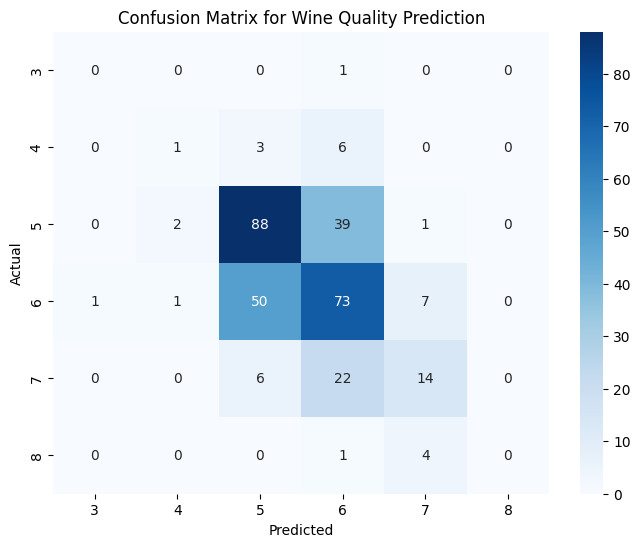

In [14]:
# visualize confusion matrix (no 2D boundary with all features)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(data['quality'].unique()), yticklabels=sorted(data['quality'].unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Wine Quality Prediction')
plt.show()

In [15]:
# save the trained model2 to a file using joblib for later use
model_dir = project_dir + '/model' 
os.makedirs(model_dir, exist_ok=True)
model_filename = os.path.join(model_dir, 'wine_quality_knn_model.pkl')
joblib.dump(knn_model, model_filename)
print(f'Model saved as {model_filename}')

Model saved as ./07_k_nearest_neighours/model/wine_quality_knn_model.pkl


In [16]:
# load the model and run a prediction test 
loaded_model = joblib.load(model_filename)
sample_data = pd.DataFrame(
    [[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 8.1]],
    columns=features
)
sample_input_scaled = scaler.transform(sample_data)  # Scale the DataFrame
sample_prediction = loaded_model.predict(sample_input_scaled)
print(f'Predicted Wine Quality for sample input: {sample_prediction[0]}')

Predicted Wine Quality for sample input: 5


/home/tarun/miniconda3/envs/own-ml-dl-experiments/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
